In [1]:
import numpy as np
from random import randint
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = load_digits()
print(dataset.keys())
print(dataset.target_names)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]


In [7]:
images =dataset.images
X = dataset.data
y = dataset.target

print(images.shape)
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


300 7


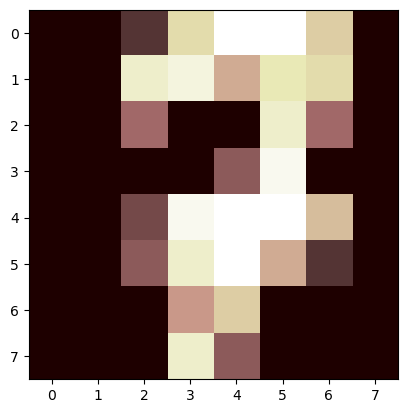

In [14]:
idx = randint(0, images.shape[0])
print(idx, y[idx])
plt.imshow(images[idx], cmap='pink')
plt.show()

In [15]:
print(images[idx])
print(X[idx])

[[ 0.  0.  1. 11. 16. 16. 10.  0.]
 [ 0.  0. 13. 14.  8. 12. 11.  0.]
 [ 0.  0.  4.  0.  0. 13.  4.  0.]
 [ 0.  0.  0.  0.  3. 15.  0.  0.]
 [ 0.  0.  2. 15. 16. 16.  9.  0.]
 [ 0.  0.  3. 13. 16.  8.  1.  0.]
 [ 0.  0.  0.  7. 10.  0.  0.  0.]
 [ 0.  0.  0. 13.  3.  0.  0.  0.]]
[ 0.  0.  1. 11. 16. 16. 10.  0.  0.  0. 13. 14.  8. 12. 11.  0.  0.  0.
  4.  0.  0. 13.  4.  0.  0.  0.  0.  0.  3. 15.  0.  0.  0.  0.  2. 15.
 16. 16.  9.  0.  0.  0.  3. 13. 16.  8.  1.  0.  0.  0.  0.  7. 10.  0.
  0.  0.  0.  0.  0. 13.  3.  0.  0.  0.]


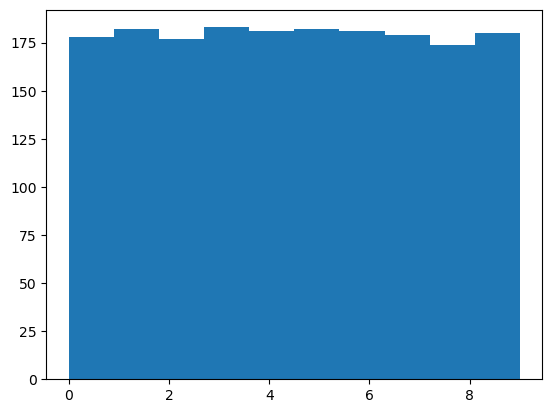

In [17]:
plt.hist(y)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [20]:
y_train[:10]

array([6, 0, 0, 3, 0, 5, 0, 0, 4, 1])

In [22]:
X_train[0,:]

array([ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
        0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
        0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
        2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.])

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_t =sc.transform(X_train)
X_test_t =sc.transform(X_test)
X_train_t[:10]

array([[ 0.00000000e+00, -3.41697551e-01, -4.63360494e-01,
         5.08364617e-01, -2.54590607e+00, -1.03722581e+00,
        -4.06234236e-01, -1.31018742e-01, -6.10349239e-02,
        -6.17254025e-01,  3.08814254e-01,  3.48328178e-03,
        -2.18152552e+00, -1.35608548e+00, -5.24655046e-01,
        -1.33360048e-01, -4.99152161e-02,  1.28519106e-01,
         1.08857992e+00, -1.93437369e-01, -1.16010978e+00,
        -1.27307852e+00, -5.52537005e-01, -1.14092482e-01,
        -3.73326696e-02,  8.63651512e-01,  1.13744682e+00,
        -1.16195968e+00, -1.60835913e+00, -1.28296188e+00,
        -6.25548724e-01, -4.57389354e-02,  0.00000000e+00,
         1.09151514e+00,  1.34318585e+00, -1.12678131e+00,
        -9.01065554e-01, -1.13185292e+00, -8.13472407e-01,
         0.00000000e+00, -6.51902857e-02,  8.28289458e-01,
         1.39981472e+00, -8.25408585e-01,  6.91771778e-01,
         1.17865528e+00, -3.37842462e-01, -9.40343404e-02,
        -3.96300945e-02,  1.59557972e-01,  1.14244768e+0

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes= (100, 10), alpha=1e-4, activation='relu', shuffle=True, max_iter=10000)

In [32]:
clf.fit(X_train, y_train )

MLPClassifier(hidden_layer_sizes=(100, 10), max_iter=10000)

In [37]:
y_pred_test = clf.predict(X_test_t)
y_pred_train = clf.predict(X_train_t)

In [38]:
exactitude_test = accuracy_score(y_pred_test, y_test)
exactitude_train = accuracy_score(y_pred_train, y_train)

print('justesse', exactitude_train, exactitude_test)


justesse 0.8427279053583855 0.8361111111111111


idx 25 label 6


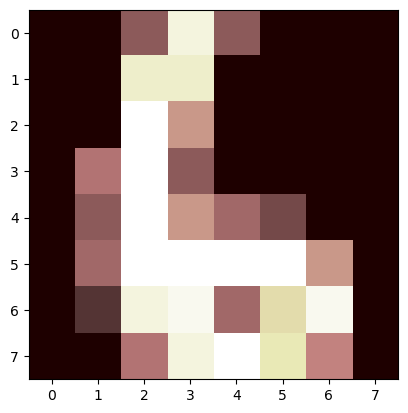

Prédiction [6]


In [41]:
idx = randint(0, X_test.shape[0])
print('idx', idx, 'label', y_test[idx])
x_test = X_test[idx]
image = x_test.reshape(8,8)
plt.imshow(image, cmap='pink')
plt.show()

x_test_sdt = sc.transform([x_test])
label = clf.predict(x_test_sdt)
print('Prédiction', label)